# Preparing data

In [1]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import datetime

In [2]:
tickers_name = "NG=F"
data = yf.download(tickers = tickers_name, period = "100y", interval = "1d")
data.to_csv(tickers_name + r"_source_dataset.csv") 
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,4.650,4.815,4.630,4.805,4.805,34954
2000-08-31,4.820,4.870,4.740,4.780,4.780,25787
2000-09-01,4.750,4.860,4.750,4.835,4.835,113
2000-09-05,4.850,4.975,4.840,4.960,4.960,26096
2000-09-06,4.990,5.110,4.960,5.065,5.065,32764
...,...,...,...,...,...,...
2023-10-02,2.958,2.958,2.835,2.840,2.840,124338
2023-10-03,2.842,2.966,2.820,2.949,2.949,128578
2023-10-04,2.940,3.055,2.935,2.962,2.962,155568


In [3]:
df_predicted = pd.read_csv(tickers_name + "_source_dataset.csv")
NTest = 100 # Возьмем тест - 100 дней
df_predicted = df_predicted[:-NTest]
df_predicted.to_csv(tickers_name + r"_dataset_for_predicte.csv", index = False) 
df_predicted

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.650,4.815,4.630,4.805,4.805,34954
1,2000-08-31,4.820,4.870,4.740,4.780,4.780,25787
2,2000-09-01,4.750,4.860,4.750,4.835,4.835,113
3,2000-09-05,4.850,4.975,4.840,4.960,4.960,26096
4,2000-09-06,4.990,5.110,4.960,5.065,5.065,32764
...,...,...,...,...,...,...,...
5696,2023-05-09,2.249,2.297,2.184,2.267,2.267,134534
5697,2023-05-10,2.262,2.265,2.160,2.191,2.191,126485
5698,2023-05-11,2.182,2.255,2.165,2.190,2.190,119033
5699,2023-05-12,2.191,2.335,2.147,2.266,2.266,159351


# ARIMA model

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv(tickers_name + "_dataset_for_predicte.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,4.65,4.815,4.63,4.805,4.805,34954
1,2000-08-31,4.82,4.870,4.74,4.780,4.780,25787
2,2000-09-01,4.75,4.860,4.75,4.835,4.835,113
3,2000-09-05,4.85,4.975,4.84,4.960,4.960,26096
4,2000-09-06,4.99,5.110,4.96,5.065,5.065,32764


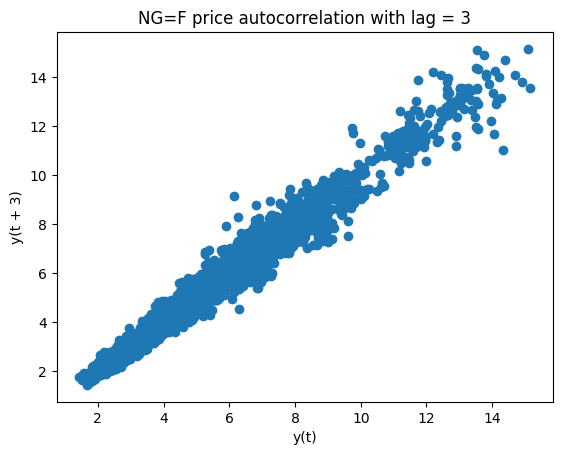

In [6]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title(tickers_name + " price autocorrelation with lag = 3")
plt.show()

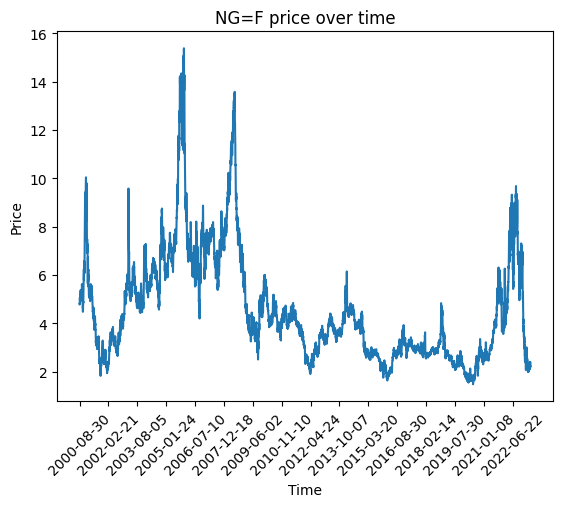

In [7]:
dfloc = df.loc[:, 'Date']
plt.plot(dfloc, df["Close"])
plt.xticks(np.arange(0, len(df), 365), rotation=45)
plt.title(tickers_name + " price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [9]:
# 1: Open, 2: High, 3: Low, 4: Close
train_data, test_data = df[:-NTest], df[-NTest:]

train_idx = df.index <= train_data.index[-1]
test_idx = df.index > train_data.index[-1]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    print(time_point, "/", N_test_observations)
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


22 / 100
23 / 100
24 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


25 / 100
26 / 100
27 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


37 / 100
38 / 100
39 / 100
40 / 100
41 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


42 / 100
43 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


92 / 100
93 / 100
94 / 100


/Users/danilazykin/jupyther/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
Testing Mean Squared Error is 0.031083059397024448


In [10]:
model = ARIMA(history, order=(4,1,0))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0]
yhat

2.369959523978584

In [11]:
model_fit.save(tickers_name + '_ARIMA_model')

In [12]:
from statsmodels.tsa.arima.model import ARIMAResults
loaded = ARIMAResults.load(tickers_name + '_ARIMA_model')

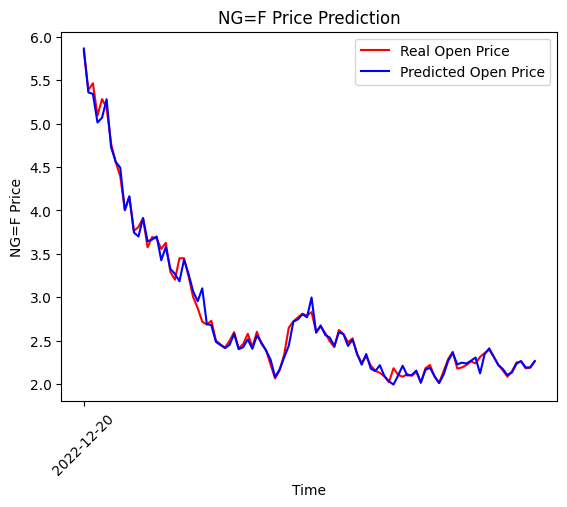

In [13]:
test_set_range = df[-NTest:]

dfloc = test_set_range.loc[:, 'Date']
plt.plot(dfloc,test_set_range.Open.values, color = 'red', label = 'Real Open Price')
plt.plot(dfloc,model_predictions, color = 'blue', label = 'Predicted Open Price')

plt.xticks(np.arange(0,len(test_set_range),100), rotation=45)
plt.title(tickers_name + ' Price Prediction')
plt.xlabel('Time')
plt.ylabel(tickers_name + ' Price')
plt.legend()
plt.show()

In [14]:
predicted_prices_df = pd.DataFrame(model_predictions, columns = ['Close'])
predicted_prices_df.to_csv (tickers_name + r'_ARIMA_model_price_prediction.csv', index = False, header=True)

# LSTM model

In [15]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from pandas.tseries.offsets import DateOffset
import plotly.express as px
import plotly.graph_objects as go
import session_info
session_info.show()

2023-10-07 18:02:05.221711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
tickers_name = "NG=F"
df = pd.read_csv(tickers_name + "_dataset_for_predicte.csv")
print("Number of rows and columns:", df.shape)
df.tail(5)

Number of rows and columns: (5701, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
5696,2023-05-09,2.249,2.297,2.184,2.267,2.267,134534
5697,2023-05-10,2.262,2.265,2.160,2.191,2.191,126485
5698,2023-05-11,2.182,2.255,2.165,2.190,2.190,119033
5699,2023-05-12,2.191,2.335,2.147,2.266,2.266,159351
5700,2023-05-15,2.265,2.384,2.250,2.375,2.375,142753


In [17]:
model = keras.models.load_model('LSTM')

In [18]:
# 1: Open, 2: High, 3: Low, 4: Close
Ntest = 100 # Возьмем тест - 100 дней
training_set = df.iloc[:-Ntest, 1:5].values
test_set = df.iloc[-Ntest:, 1:5].values

print(training_set.shape)
print(test_set.shape)

(5601, 4)
(100, 4)


In [20]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0:4])
    y_train.append(training_set_scaled[i, 0:4])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

y_train.shape

(5541, 4)

In [21]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 4))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = NTest, batch_size = 32)

Epoch 1/100
174/174 [==============================] - 14s 51ms/step - loss: 0.0060
Epoch 2/100
174/174 [==============================] - 9s 51ms/step - loss: 0.0028
Epoch 3/100
174/174 [==============================] - 9s 53ms/step - loss: 0.0021
Epoch 4/100
174/174 [==============================] - 9s 52ms/step - loss: 0.0017
Epoch 5/100
174/174 [==============================] - 9s 51ms/step - loss: 0.0015
Epoch 6/100
174/174 [==============================] - 9s 49ms/step - loss: 0.0014
Epoch 7/100
174/174 [==============================] - 9s 50ms/step - loss: 0.0013
Epoch 8/100
174/174 [==============================] - 9s 49ms/step - loss: 0.0013
Epoch 9/100
174/174 [==============================] - 9s 51ms/step - loss: 0.0011
Epoch 10/100
174/174 [==============================] - 9s 50ms/step - loss: 0.0010
Epoch 11/100
174/174 [==============================] - 9s 50ms/step - loss: 0.0010
Epoch 12/100
174/174 [==============================] - 9s 51ms/step - loss: 9.0893e

In [22]:
model.save(tickers_name + '_LSTM_model')

INFO:tensorflow:Assets written to: NG=F_LSTM_model/assets


INFO:tensorflow:Assets written to: NG=F_LSTM_model/assets


In [42]:
dataset_train = df.iloc[:-NTest, 1:5]
dataset_test = df.iloc[-NTest:, 1:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].to_numpy()
inputs = inputs.reshape(-1,4)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test)):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 4))
print(X_test.shape)

X_test

(40, 60, 4)


array([[[0.32006705, 0.30528391, 0.28496908, 0.27662638],
        [0.28777608, 0.28438755, 0.28563976, 0.27705813],
        [0.29331585, 0.28748329, 0.26402861, 0.25309442],
        ...,
        [0.08280486, 0.07232815, 0.07094419, 0.06886873],
        [0.07595306, 0.06944346, 0.07429763, 0.07426597],
        [0.07916029, 0.0680363 , 0.06669647, 0.06160046]],

       [[0.28777608, 0.28438755, 0.28563976, 0.27705813],
        [0.29331585, 0.28748329, 0.26402861, 0.25309442],
        [0.26620016, 0.25877717, 0.25285042, 0.25885146],
        ...,
        [0.07595306, 0.06944346, 0.07429763, 0.07426597],
        [0.07916029, 0.0680363 , 0.06669647, 0.06160046],
        [0.06603979, 0.06050799, 0.05805201, 0.0533247 ]],

       [[0.29331585, 0.28748329, 0.26402861, 0.25309442],
        [0.26620016, 0.25877717, 0.25285042, 0.25885146],
        [0.28004957, 0.26736088, 0.27192785, 0.27345999],
        ...,
        [0.07916029, 0.0680363 , 0.06669647, 0.06160046],
        [0.06603979, 0.060507

In [43]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

2/2 [==============================] - 0s 14ms/step


(40, 4)

In [44]:
predicted_stock_price[0: , 0].shape

(40,)

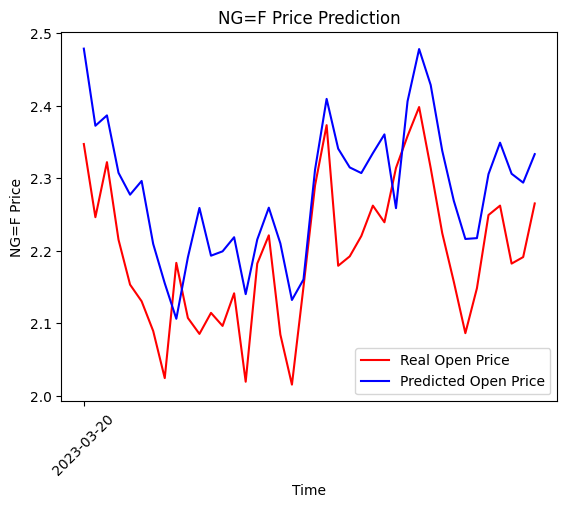

In [49]:
test_set_range = df[-40:]

dfloc = test_set_range.loc[:, 'Date']
plt.plot(dfloc,test_set_range.Open.values, color = 'red', label = 'Real Open Price')
plt.plot(dfloc,predicted_stock_price[0: , 0], color = 'blue', label = 'Predicted Open Price')

plt.xticks(np.arange(0,len(test_set_range),40), rotation=45)
plt.title(tickers_name + ' Price Prediction')
plt.xlabel('Time')
plt.ylabel(tickers_name + ' Price')
plt.legend()
plt.show()

In [50]:
predicted_prices_df = pd.DataFrame(predicted_stock_price, columns = ['Open','High','Low', 'Close'])
predicted_prices_df.to_csv (r'combined_model_price_prediction.csv', index = False, header=True)